In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

### _NOT_ excluding the Income, Education, NoDocbcCost columns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
balance_Data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
balance_Data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
X = balance_Data.drop(['Diabetes_binary'], axis=1)
y = balance_Data['Diabetes_binary']
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
indices = np.arange(70692)
train_indices, test_indices = train_test_split(indices, test_size=0.2, random_state=139)
X_test = X.iloc[test_indices]
X_train = X.iloc[train_indices]
y_test = y.iloc[test_indices]
y_train = y.iloc[train_indices]

In [29]:
xtrain = X_train.to_numpy()
xtest = X_test.to_numpy()
ytrain = y_train.to_numpy().reshape(-1)
ytest = y_test.to_numpy().reshape(-1)
xtrain.shape, ytrain.shape

((56553, 21), (56553,))

In [30]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=7)
tree_model.fit(xtrain[:20000], ytrain[:20000])

DecisionTreeClassifier(max_depth=7)

In [31]:
pred_train = tree_model.predict(xtrain[:20000])
print(np.mean(pred_train == ytrain[:20000]))

0.756


In [32]:
t_ixs = np.random.choice(len(ytest), size=5500, replace=False)
pred_test = tree_model.predict(xtest[t_ixs])
print(np.mean(pred_test == ytest[t_ixs]))

0.7376363636363636


---

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
boosted_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='gini',max_depth=5), n_estimators=50,learning_rate=1.2)
boosted_model.fit(xtrain, ytrain)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=1.2)

In [38]:
pred_train = boosted_model.predict(xtrain)
print(np.mean(pred_train == ytrain))

0.7557512421975846


In [39]:
pred_test = boosted_model.predict(xtest)
print(np.mean(pred_test == ytest))

0.7449607468703586


In [40]:
boosted_model.estimator_weights_

array([1.22891707, 0.54273063, 0.37897026, 0.38709161, 0.27666709,
       0.31226395, 0.24747869, 0.18812891, 0.18579683, 0.19286682,
       0.18478602, 0.26577571, 0.19105885, 0.1781763 , 0.1348334 ,
       0.12805971, 0.23000761, 0.10894443, 0.12931704, 0.10901302,
       0.1127026 , 0.20531452, 0.1909749 , 0.13086168, 0.12082613,
       0.10002468, 0.13216175, 0.12287929, 0.11311548, 0.13665541,
       0.11296197, 0.11474344, 0.16004439, 0.08527431, 0.10354768,
       0.10817077, 0.1160491 , 0.10683423, 0.07698574, 0.0678308 ,
       0.06574766, 0.06349353, 0.05989472, 0.08297876, 0.06247652,
       0.05935155, 0.04568329, 0.05879545, 0.05730188, 0.07643106])

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

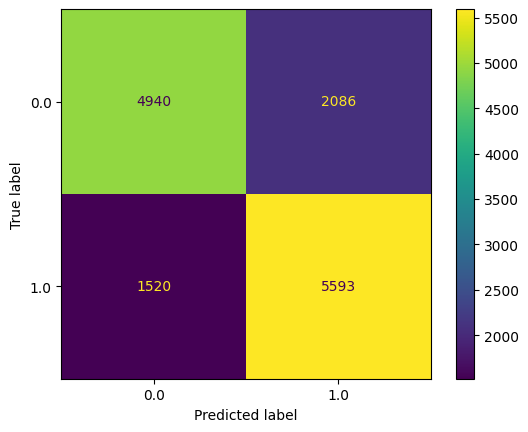

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix(ytest, pred_test, labels=boosted_model.classes_), display_labels=boosted_model.classes_)
disp.plot()
plt.show()

In [42]:
recall = 5593/(5593 + 1520)
precision = 5593/(5593 + 2086)
precision, recall

(0.7283500455788514, 0.786306762266273)

In the binary features, are all the data points distinct?

In [5]:
binX = X[['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']]

In [6]:
binX.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
tree = DecisionTreeClassifier()
tree.fit(binX, y)

In [9]:
tree.score(binX, y)

0.7280880439087875

In [10]:
tree.get_depth()

14

In [17]:
predAll = tree.predict(binX)

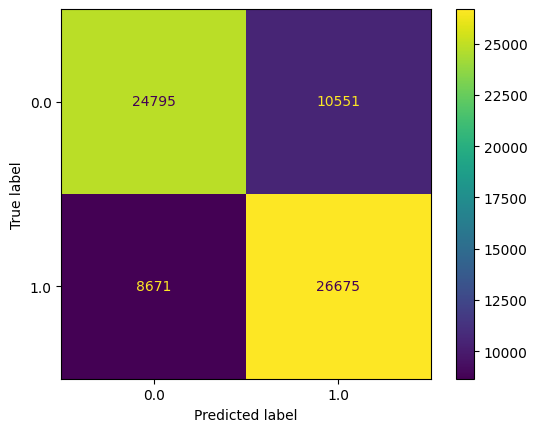

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix(y, predAll, labels=tree.classes_), display_labels=tree.classes_)
disp.plot()
plt.show()

In [24]:
recall = 26675/(26675 + 8671)
precision = 26675/(26675 + 10551)
precision, recall

(0.7165690646322462, 0.7546822837096135)

In [50]:
binX0 = binX[binX.columns] == tuple(binX.iloc[0])
binX0['all'] = binX0['HighBP']*binX0['HighChol']*binX0['CholCheck']*binX0['Smoker']*binX0['Stroke']*binX0['HeartDiseaseorAttack']*binX0['PhysActivity']*binX0['Fruits']*binX0['Veggies']*binX0['HvyAlcoholConsump']*binX0['AnyHealthcare']*binX0['NoDocbcCost']*binX0['DiffWalk']*binX0['Sex']
binX0['all']

0         True
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Name: all, Length: 70692, dtype: bool

In [52]:
np.mean(binX0['all'].astype(int))

np.float64(0.005941266338482431)

In [89]:
binX1 = binX[binX.columns] == tuple(binX.iloc[np.random.randint(70692)])
binX1['all'] = binX1['HighBP']*binX1['HighChol']*binX1['CholCheck']*binX1['Smoker']*binX1['Stroke']*binX1['HeartDiseaseorAttack']*binX1['PhysActivity']*binX1['Fruits']*binX1['Veggies']*binX1['HvyAlcoholConsump']*binX1['AnyHealthcare']*binX1['NoDocbcCost']*binX1['DiffWalk']*binX1['Sex']
np.mean(binX1['all'].astype(int))

np.float64(0.003225258869461891)

In [66]:
binX2 = binX[binX.columns] == tuple(binX.iloc[20])
binX2['all'] = binX2['HighBP']*binX2['HighChol']*binX2['CholCheck']*binX2['Smoker']*binX2['Stroke']*binX2['HeartDiseaseorAttack']*binX2['PhysActivity']*binX2['Fruits']*binX2['Veggies']*binX2['HvyAlcoholConsump']*binX2['AnyHealthcare']*binX2['NoDocbcCost']*binX2['DiffWalk']*binX2['Sex']
np.mean(binX2['all'].astype(int))

np.float64(0.0456062920839699)

In [70]:
np.mean(y[np.where(binX2['all'])[0]])

np.float64(0.1163151364764268)

In [9]:
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Xbinary = X[binary_cols]

In [150]:
# make each dataframe entry True/False - whether it matches row 2725 entry
X_vertex = Xbinary[Xbinary.columns] == tuple(Xbinary.iloc[2725])

# multiply columns ('all' equals 1 or 0, 1 when True in all cols <- same vertex as  row 2725); 
# take mean to get percent that are True
X_vertex['all'] = X_vertex.prod(axis=1)
np.mean(X_vertex['all'].astype(int))

np.float64(0.005106659876647994)

In [151]:
# the average of labels (0 or 1) of rows that agree with row 2725
np.mean( y[np.where(X_vertex['all'])[0]] )

np.float64(0.8421052631578947)

In [42]:
X_vertex = Xbinary[Xbinary.columns] == tuple(Xbinary.iloc[12])
X_vertex['all'] = X_vertex.prod(axis=1)
np.mean(X_vertex['all'].astype(int)), np.mean( y[np.where(X_vertex['all'])[0]] )

(np.float64(0.015319979629943982), np.float64(0.5918744228993537))

In [11]:
nonbinary_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
Xnonbinary = X[nonbinary_cols]

In [43]:
rows_at_12 = Xnonbinary.to_numpy()[np.where(X_vertex['all'])[0]]
y_at_12 = y[np.where(X_vertex['all'])[0]]

In [44]:
label1_rows = rows_at_12[y_at_12 > 0]
label0_rows = rows_at_12[y_at_12 < 1]
label1_rows.shape, label0_rows.shape

((641, 7), (442, 7))

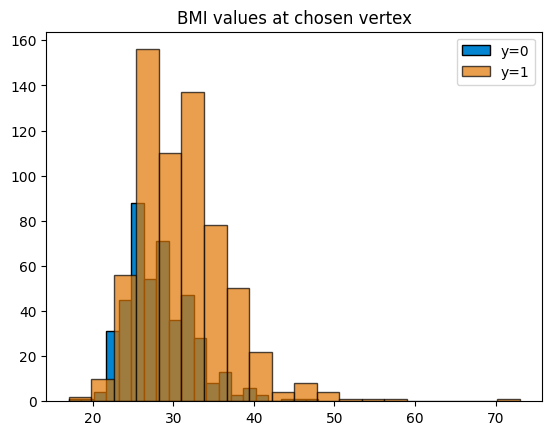

In [45]:
plt.hist(label0_rows[:,0], bins=20, edgecolor='black', facecolor='xkcd:cerulean', label='y=0')
plt.hist(label1_rows[:,0], bins=20, edgecolor='black', facecolor='xkcd:pumpkin', alpha=0.7, label='y=1')
plt.title('BMI values at chosen vertex')
plt.legend()
plt.show()

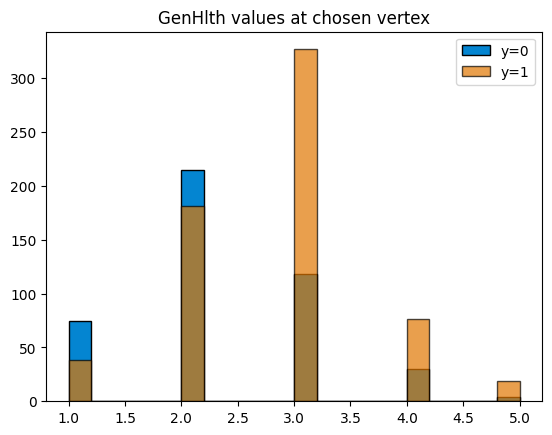

In [46]:
plt.hist(label0_rows[:,1], bins=20, edgecolor='black', facecolor='xkcd:cerulean', label='y=0')
plt.hist(label1_rows[:,1], bins=20, edgecolor='black', facecolor='xkcd:pumpkin', alpha=0.7, label='y=1')
plt.title('GenHlth values at chosen vertex')
plt.legend()
plt.show()

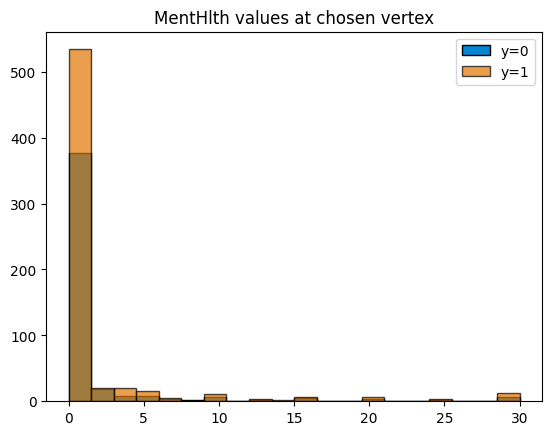

In [47]:
plt.hist(label0_rows[:,2], bins=20, edgecolor='black', facecolor='xkcd:cerulean', label='y=0')
plt.hist(label1_rows[:,2], bins=20, edgecolor='black', facecolor='xkcd:pumpkin', alpha=0.7, label='y=1')
plt.title('MentHlth values at chosen vertex')
plt.legend()
plt.show()

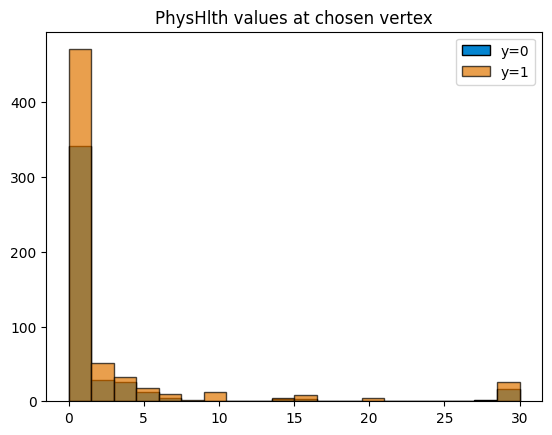

In [50]:
plt.hist(label0_rows[:,3], bins=20, edgecolor='black', facecolor='xkcd:cerulean', label='y=0')
plt.hist(label1_rows[:,3], bins=20, edgecolor='black', facecolor='xkcd:pumpkin', alpha=0.7, label='y=1')
plt.title('PhysHlth values at chosen vertex')
plt.legend()
plt.show()

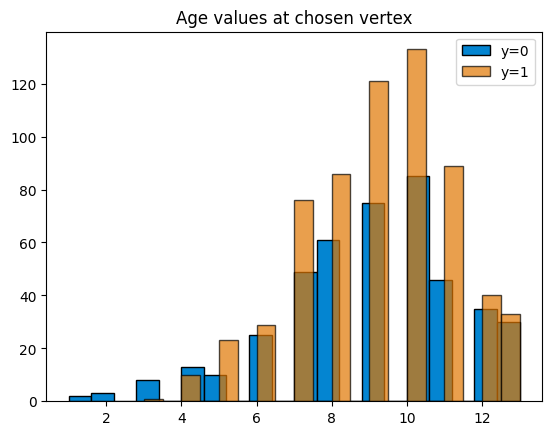

In [49]:
plt.hist(label0_rows[:,4], bins=20, edgecolor='black', facecolor='xkcd:cerulean', label='y=0')
plt.hist(label1_rows[:,4], bins=20, edgecolor='black', facecolor='xkcd:pumpkin', alpha=0.7, label='y=1')
plt.title('Age values at chosen vertex')
plt.legend()
plt.show()

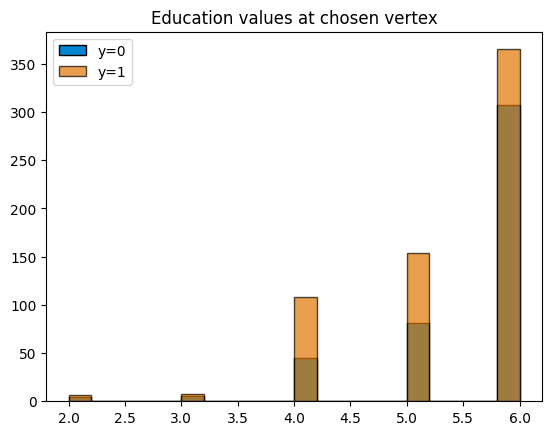

In [51]:
plt.hist(label0_rows[:,5], bins=20, edgecolor='black', facecolor='xkcd:cerulean', label='y=0')
plt.hist(label1_rows[:,5], bins=20, edgecolor='black', facecolor='xkcd:pumpkin', alpha=0.7, label='y=1')
plt.title('Education values at chosen vertex')
plt.legend()
plt.show()

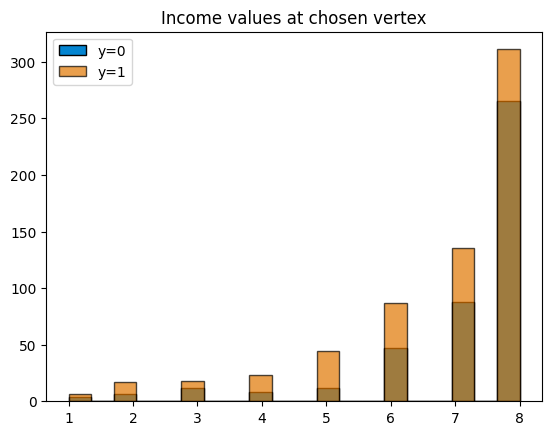

In [52]:
plt.hist(label0_rows[:,6], bins=20, edgecolor='black', facecolor='xkcd:cerulean', label='y=0')
plt.hist(label1_rows[:,6], bins=20, edgecolor='black', facecolor='xkcd:pumpkin', alpha=0.7, label='y=1')
plt.title('Income values at chosen vertex')
plt.legend()
plt.show()

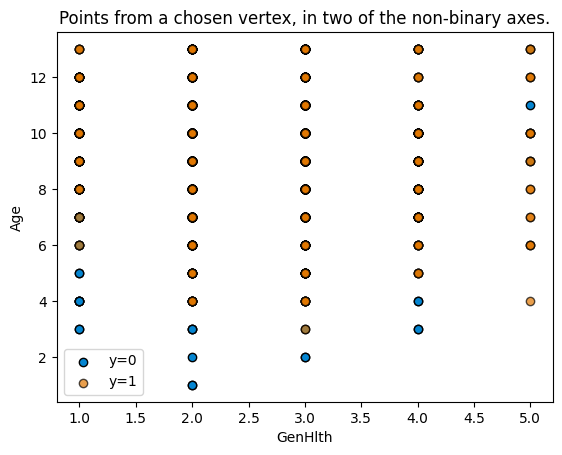

In [54]:
plt.scatter(label0_rows[:,1], label0_rows[:,4], edgecolor='black', c='xkcd:cerulean', label='y=0')
plt.scatter(label1_rows[:,1], label1_rows[:,4], edgecolor='black', c='xkcd:pumpkin', alpha=0.7, label='y=1')
plt.title('Points from a chosen vertex, in two of the non-binary axes.')
plt.xlabel('GenHlth')
plt.ylabel('Age')
plt.legend()
plt.show()

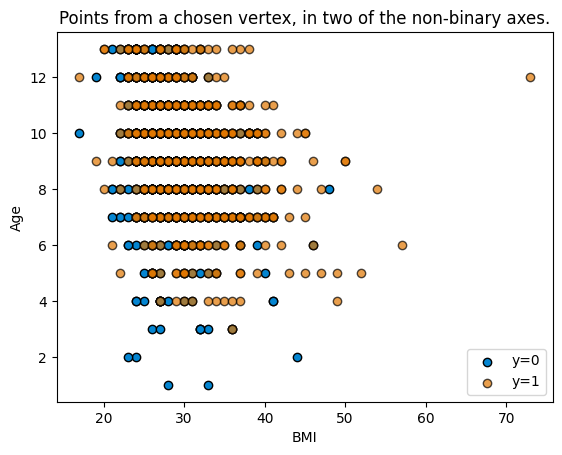

In [53]:
plt.scatter(label0_rows[:,0], label0_rows[:,4], edgecolor='black', c='xkcd:cerulean', label='y=0')
plt.scatter(label1_rows[:,0], label1_rows[:,4], edgecolor='black', c='xkcd:pumpkin', alpha=0.7, label='y=1')
plt.title('Points from a chosen vertex, in two of the non-binary axes.')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.legend()
plt.show()

In [71]:
4.5/70692

6.365642505516891e-05

In [18]:
np.random.randint(70692)

29710

In [93]:
tree.predict(binX.to_numpy()[0:1])

c:\Users\gener\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

LOOE

In [95]:
gotitcorrect = []
ixs = np.random.randint(len(y), size=1000)
x = binX.to_numpy()
for ix in ixs:
    xloo = np.concatenate((x[:ix], x[ix+1:]))
    tree = DecisionTreeClassifier()
    tree.fit(xloo, np.concatenate((y[:ix], y[ix+1:])))
    gotitcorrect.append(tree.predict(x[ix:ix+1])[0] == y[ix])


In [96]:
gotitcorrect[:10]

[np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.True_,
 np.False_,
 np.True_]

In [97]:
np.mean(gotitcorrect)

np.float64(0.693)

In [98]:
np.mean(y)

np.float64(0.5)

In [102]:
np.sum([gotitcorrect[i] if y[ixs[i]]==1 else np.False_  for i in range(1000)])/np.sum(y[ixs])

np.float64(0.7153846153846154)